# 7. Interpolation needs - Census Tracts

*just visuals*

*eda/07-interpolation.ipynb contain an analysis over BG's*

In [1]:
import matplotlib.pyplot as plt

from cpe_help import list_departments
from cpe_help.util import crs

In [2]:
epsg2163 = {'init': 'epsg:2163'}
epsg4326 = crs.epsg4326

In [3]:
def plot_density_and_boundaries(dept, ax):
    tracts = dept.load_census_tracts()
    tracts['Total Population'] = tracts['Total Population'].astype(int)
    tracts['Area'] = tracts.to_crs(epsg2163).area / (10 ** 6)
    tracts['Density'] = tracts['Total Population'] / tracts['Area']

    police = dept.load_preprocessed_shapefile()
    police = police.to_crs(tracts.crs)

    x1, y1, x2, y2 = police.total_bounds
    xmargin = (x2 - x1) / 50
    ymargin = (y2 - y1) / 50
    x1 -= xmargin
    x2 += xmargin
    y1 -= ymargin
    y2 += ymargin

    tracts = tracts.cx[x1:x2, y1:y2]

    ax.set_aspect('equal')
    ax.set_xlim(x1, x2)
    ax.set_ylim(y1, y2)

    tracts.plot(
        ax=ax,
        column='Density',
        cmap='viridis',
        edgecolor='face',
        figsize=(16, 12),
        legend=True,
    )
    police.plot(
        ax=ax,
        facecolor='none',
        edgecolor='white',
        alpha=0.7,
    )
    
    ax.set_title(f'Dept. {dept.name}')

### Plot tract population densities (/km^2)

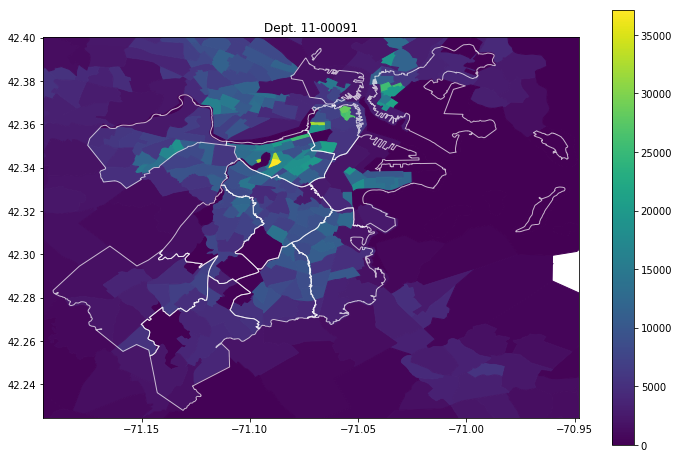

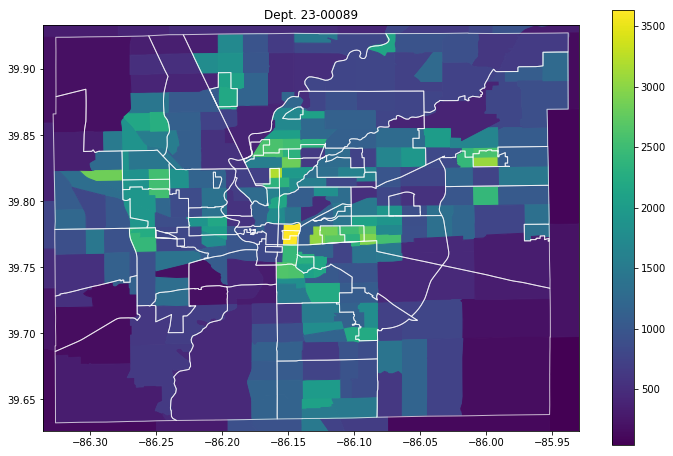

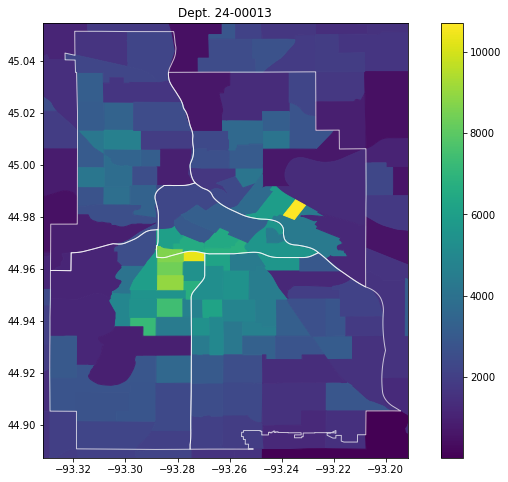

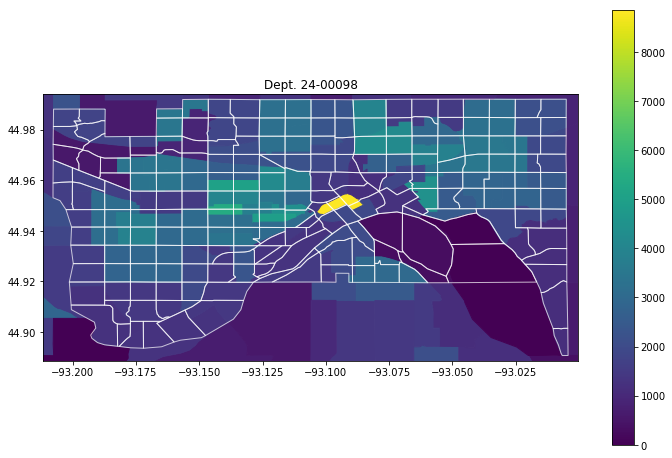

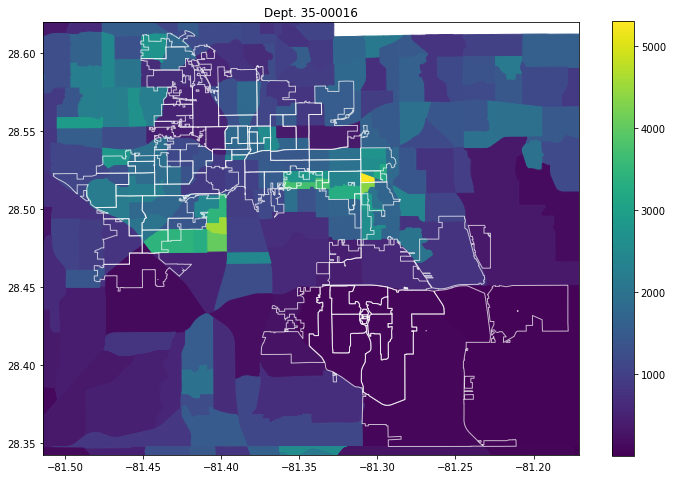

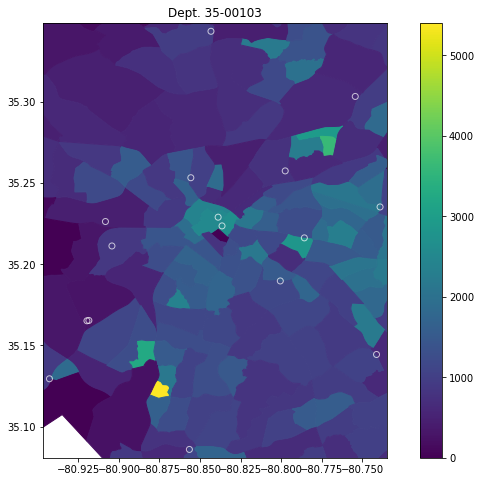

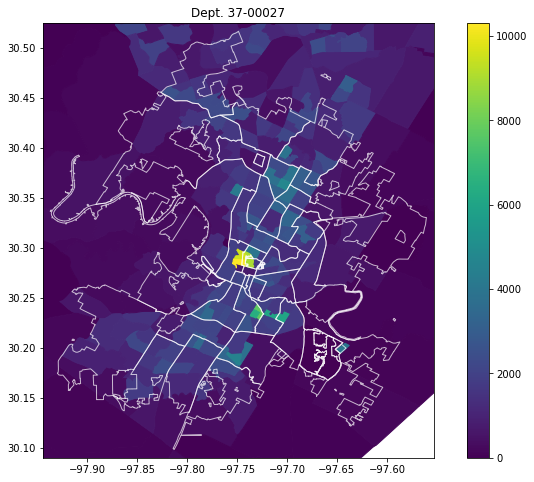

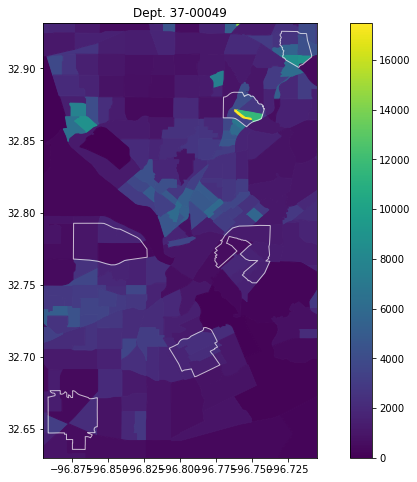

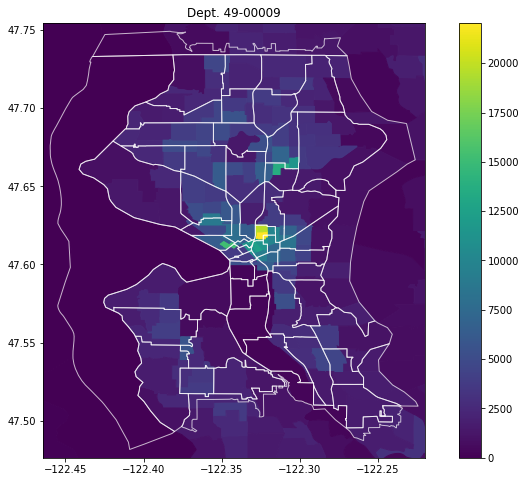

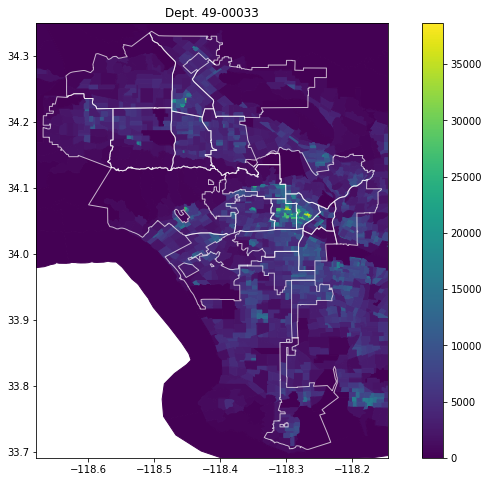

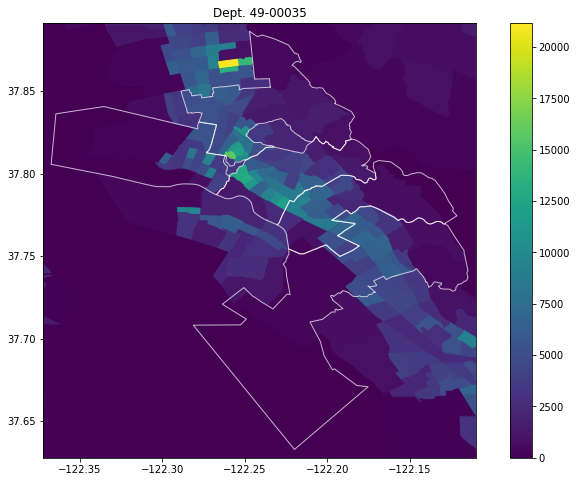

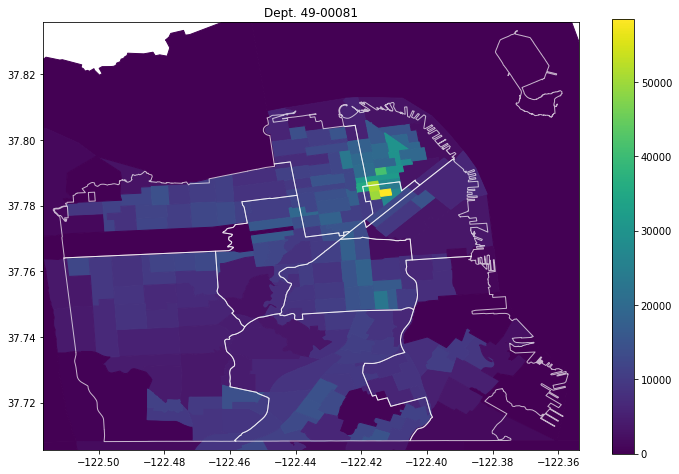

In [4]:
for dept in list_departments():
    fig, ax = plt.subplots(figsize=(12, 8))
    plot_density_and_boundaries(dept, ax)